In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from os import listdir, path, makedirs
from os.path import isfile, join

In [ ]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [ ]:
faces_path_treino = 'imagens/treino/'
faces_path_teste = 'imagens/teste/'

In [121]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [122]:
dados_treinamento, sujeitos = [],[]

In [123]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [124]:
dados_teste, sujeitos_teste = [],[]

In [125]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [132]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

# Modelo Eingenfaces

In [133]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [134]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

In [221]:
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(2, 3820.0800013895355)

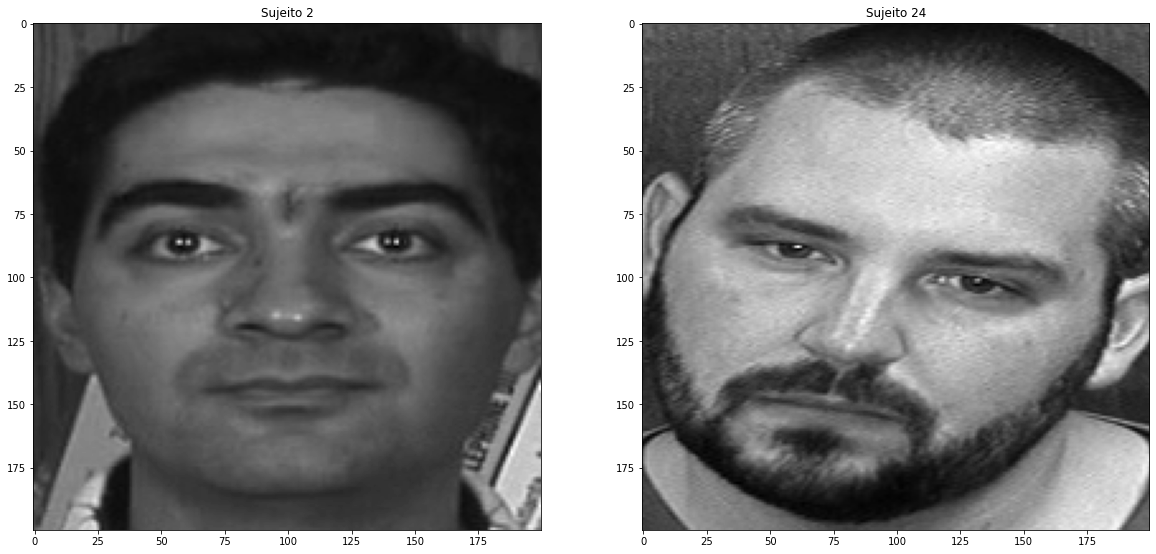

In [222]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[115]))
plt.imshow(dados_teste[115], cmap="gray")

In [219]:
predicao = modelo_eingenfaces.predict(dados_teste[115])
predicao

(24, 6748.244870827021)

In [223]:
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(2, 3820.0800013895355)

# Modelo Fisherfaces

In [224]:
modelo_fisherfaces = cv2.face_FisherFaceRecognizer.create()

In [226]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

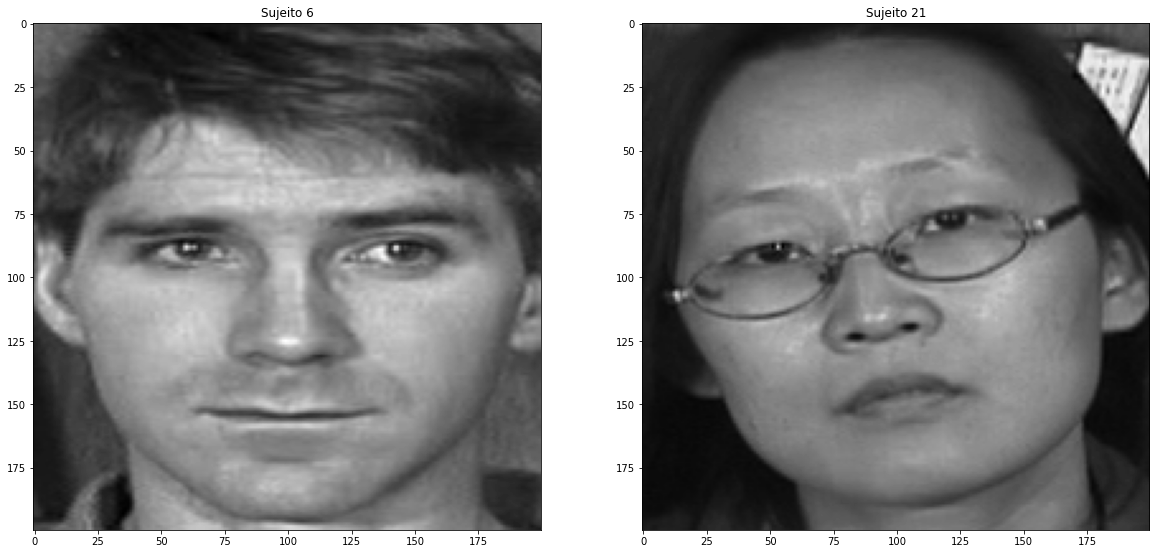

In [243]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[25]))
plt.imshow(dados_teste[25], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[102]))
plt.imshow(dados_teste[102], cmap="gray")

In [244]:
predicao = modelo_fisherfaces.predict(dados_teste[25])
predicao

(6, 722.3106749286811)

In [242]:
predicao = modelo_fisherfaces.predict(dados_teste[102])
predicao

(21, 1229.0013858552684)

# Modelo LBPH

In [246]:
modelo_lbph = cv2.face_LBPHFaceRecognizer.create()

In [247]:
modelo_lbph.train(dados_treinamento, sujeitos)

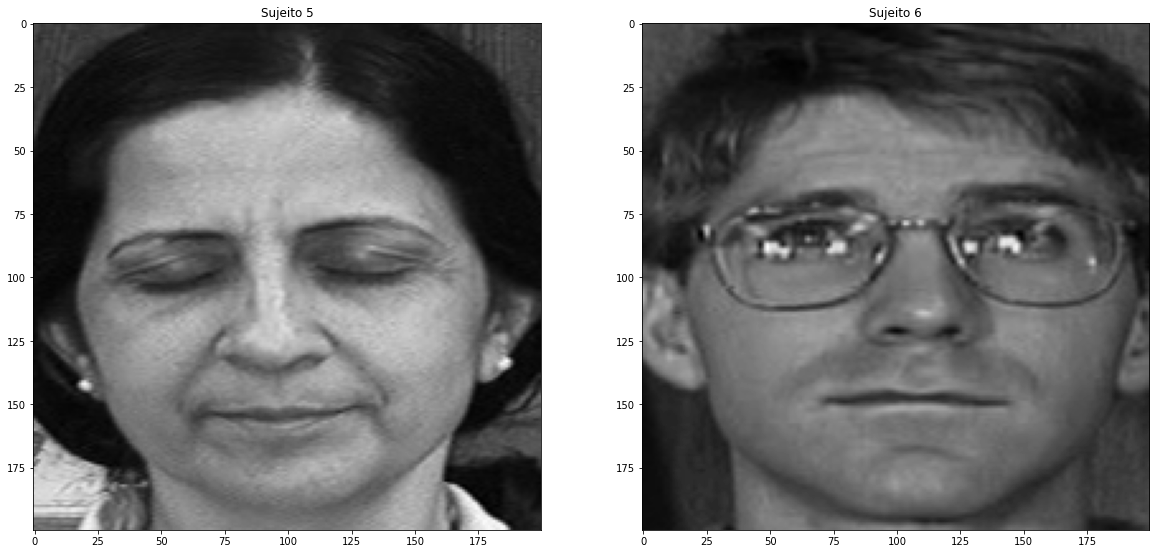

In [248]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

In [250]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 32.938584374874814)

In [252]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 36.49919959564635)